## Understanding a query 

In the last tutorial, we saw how MuSpAn can interpret certain tuples as specifying sets of objects. In this tutorial, we'll explore the underlying ```muspan.query``` module in detail, and explain which tuples MuSpAn can convert into a query. We'll go into quite a lot of detail regarding what's happening 'under the hood', so it's not necessary to understand everything in this tutorial, and it can be skipped if desired.

MuSpAn queries ultimately rely on one particular class, ```muspan.query.query```, which is designed to standardise the format of a [Boolean query](https://en.wikipedia.org/wiki/Boolean_algebra). Each query has three parts: a `property`, a `relation`, and a `comparison_value` (query also takes the domain in as an argument: `ms.query.query(domain, property, relation, comparison_value)`). All that a MuSpAn query object does is store these aspects, and check that they are things MuSpAn can understand in relation to a given domain. The important thing to remember is that for each object in the domain, a MuSpAn query asks a question about how some property of that object relates to the comparison_value that can be evaluated as `True` or `False`.

The simplest way to understand this is through some examples below, but the section below contains more details about how a MuSpAn query works that can be skipped if desired. 

<details>
    
Let's start with the ```property``` we're interested in. As far as the ```query``` is concerned, a property is a tuple that specifies some value for each object. Here are a few properties of MuSpAn objects that we might want to consider:
- ('label','Celltype') -> this specifies the value of a label associated with an object, with the label name "Celltype".
- ('object','type') -> this specifies the type of an object - the value returned will be either point, line, or shape.
- ('collection',) -> this returns the set of collections that an object belongs to.

There are more possible tuples that can be understood by query as properties, including properties which specify the distance of objects from one another, or whether an object is enclosed by a shape. A full list can be found in the documentation.

A property generates an array of values, one corresponding to each object in the domain. The other parts of the query - ```relation``` and ```comparison_value``` - determine how to test each value in turn to determine whether each object matches the query. ```relation``` can be any [python operator](https://docs.python.org/3/library/operator.html), as well as a wide array of comparative statements (see documentation for full list of options), while ```comparison_value``` simply determines the value against which to test each element of the array generated by property.

To summarise: `property` is interpreted as an array of values, one for each object. Each value is in turn tested against a `comparison_value`, to see whether it matches the `relation`: the result is either `True` or `False`, for every object in the domain.
</details>

Let's load in the mouse colon region of interest that we used in the previous example.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x600 with 2 Axes>, <Axes: >)

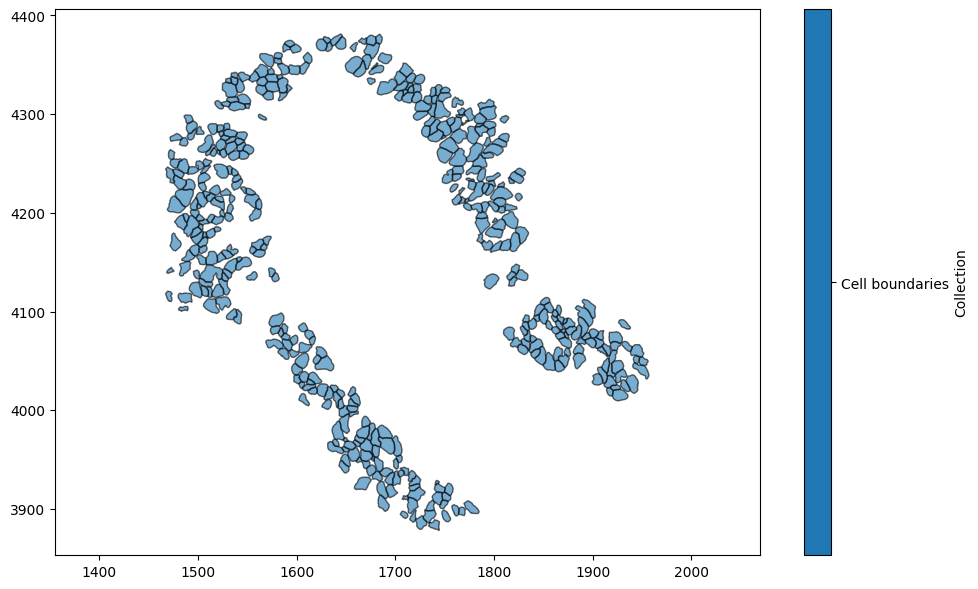

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt
import numpy as np

# Load the example domain dataset
domain = ms.datasets.load_example_domain('Xenium-Healthy-Colon')

# Create a figure for plotting
plt.figure(figsize=(10,6))

# Visualise the domain with objects belonging to 'Cluster 2'
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=('Cluster ID','Cluster 2'))

As we noted in the previous tutorial, the tuple ```('Cluster ID','Cluster 2')``` that we're passing as an argument to ```visualise``` is interpreted by MuSpAn as a ```query``` object. In fact, behind the scenes, MuSpAn is converting this tuple into the query ```ms.query.query(domain, ('label','Cluster ID'),'is','Cluster 2')```. The order of arguments in query is designed to read almost as an english language query - we want everything in this domain where the label Cluster ID is Cluster 2. Let's explicitly pass this query to visualise:

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

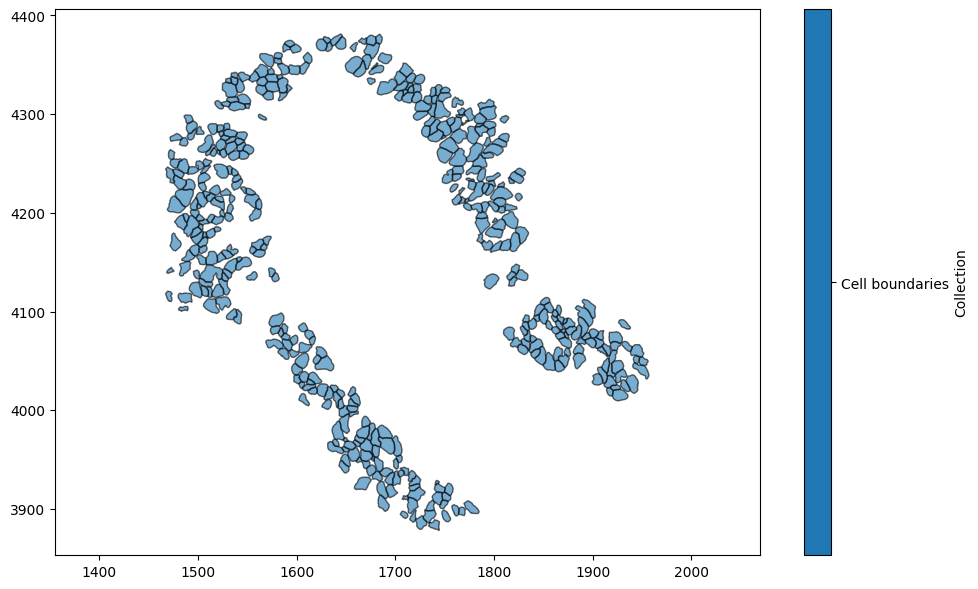

In [2]:
# Create a query to select objects where the label 'Cluster ID' is 'Cluster 2'
query_cluster2 = ms.query.query(domain, ('label', 'Cluster ID'), 'is', 'Cluster 2')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Visualise the domain with objects matching the query
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=query_cluster2)

It's worth mentioning briefly the logic behind allowing certain tuples, like ```('Cluster ID','Cluster 2')```, to be interpreted as queries. MuSpAn aims to be as user friendly as possible, and for a user not too familiar with coding a statement like ```ms.query.query(domain, ('label','Cluster ID'),'is','Cluster 2')``` is a bit of a daunting barrier. We don't want people to have to become intimately familiar with the query structure before they can plot a subset of cells, which should be a fairly straightforward task! As a result, any part of MuSpAn which accepts a query can also accept a limited number of other objects, which we call <i>query-like</i> objects.

A query-like object is anything that MuSpAn can ultimately interpret as a list of Object IDs. For completeness, the query-like things that MuSpAn recognises are:

- Queries
- Query containers - these massively boost the power of queries to ask complex questions, and will be explained in the next tutorial
- Tuples of the following forms:
  - `(label_name, label_value)` - interpreted as ```ms.query.query(domain, ('label',label_name),'is',label_value)```
  - `('collection', collection_name)` - interpreted as ```ms.query.query(domain, ('collection',),'is',collection_name)```
  - `('object', object_type)` - interpreted as ```ms.query.query(domain, ('object','type'),'is',object_type)```
  - `('label', label_name)` - interpreted as ```ms.query.query(domain, ('label',label_name),'is',True)```, i.e., the object has this label

Additionally, lists of integers are not query-like, but will be interpreted directly as a list of object IDs in most places that accept queries.